Eigenvalues (ion values):
[2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors (ion vectors):
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


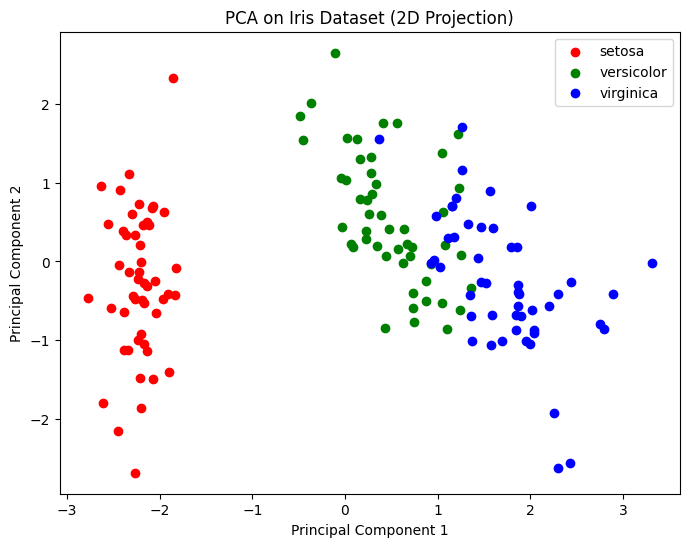

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues (ion values):")
print(eigenvalues)
print("\nEigenvectors (ion vectors):")
print(eigenvectors)

# Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Project data onto first 2 principal components
X_pca = X_scaled.dot(eigenvectors[:, :2])

# Visualize
plt.figure(figsize=(8,6))
for target, color, label in zip([0,1,2], ['r','g','b'], iris.target_names):
    plt.scatter(X_pca[y==target, 0], X_pca[y==target, 1], c=color, label=label)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset (2D Projection)")
plt.legend()
plt.show()
